In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Overview of Cars, Registered in Germany (Jan. 2017/18)

Data taken from the website of [Kraftfahrt Bundesamt](https://www.kba.de/DE/Home/home_node.html), which is the government agency dealing with road traffic, as suborganisation of the Federal ministry of Transport and Digital Infrastructure.

Statistical data of registered vehicles, grouped by brand, model and size, comparing Janurary 2017 to Janurary 2018, was downloaded from [here](https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/Segmente/segmente_node.html).

In [2]:
# Read the Excel file. Define multi header lines, select desired sheet,
# use the first two columns ['Segment', 'Modellreihe'] as index,
# ignore the last 5 rows as they are general information.
pkw_data_2017_18 = pd.read_excel('fz12_2018_xls.xls', usecols=[1,2,3,4,5,6,7],
                                 header=[7,8], 
                                 sheet_name='Segmente_Bestand_2018',
                                 index_col=[0,1], skipfooter = 5)


In [3]:
pkw_data_2017_18.head()

1. Januar 2018             1. Januar 2017              \
Modellreihe                   Anzahl Anteil in %         Anzahl Anteil in %   
MINIS AUSTIN MINI               8364         0.3           8477         0.3   
      CHEVROLET MATIZ          47673         1.5          52306         1.7   
      CHEVROLET SPARK          34527         1.1          35295         1.1   
      CITROEN C1              102387         3.2          99842         3.2   
      DAIHATSU CUORE           28148         0.9          31570           1   

                      Veränderung gegenüber 1. Januar 2017 in %  
Modellreihe                                  Unnamed: 6_level_1  
MINIS AUSTIN MINI                                          -1.3  
      CHEVROLET MATIZ                                      -8.9  
      CHEVROLET SPARK                                      -2.2  
      CITROEN C1                                            2.5  
      DAIHATSU CUORE                                      -10.8

In [4]:
# How to address/locate a specific cell.
pkw_data_2017_18.loc[('MINIS', 'AUSTIN MINI'), ('1. Januar 2018', 'Anzahl')]

8364

In [5]:
# Get the labels of the first index column as a list.
il = pkw_data_2017_18.index.get_level_values(0).tolist()

# Remove dublicates from the index label list.
index_list = list(dict.fromkeys(il))

# Sort index list into segments and segment totals.
segment = []
segment_totals = []
for i in index_list:
    if 'ZUSAMMEN' in i:
        segment_totals.append(i)
    else:
        segment.append(i)

print('Segment:')
print(segment)
print('')
print('Segment totals:')
print(segment_totals)

Segment:
['MINIS', 'KLEINWAGEN', 'KOMPAKTKLASSE', 'MITTELKLASSE', 'OBERE MITTELKLASSE', 'OBERKLASSE', 'SUVs', 'GELÄNDEWAGEN', 'SPORTWAGEN', 'MINI-VANS', 'GROSSRAUM-VANS', 'UTILITIES', 'WOHNMOBILE', 'SONSTIGE ', 'BESTAND INSGESAMT']

Segment totals:
['MINIS ZUSAMMEN', 'KLEINWAGEN ZUSAMMEN', 'KOMPAKTKLASSE ZUSAMMEN', 'MITTELKLASSE ZUSAMMEN', 'OBERE MITTELKLASSE ZUSAMMEN', 'OBERKLASSE ZUSAMMEN', 'SUVs ZUSAMMEN', 'GELÄNDEWAGEN ZUSAMMEN', 'SPORTWAGEN ZUSAMMEN', 'MINI-VANS ZUSAMMEN', 'GROSSRAUM-VANS ZUSAMMEN', 'UTILITIES ZUSAMMEN', 'WOHNMOBILE ZUSAMMEN']


In [6]:
# Extract number of total registered cars by segment and year.
# 2017
car_segment_total_2017 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2017', 'Anzahl')]
    car_segment_total_2017.append(val)

# 2018
car_segment_total_2018 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2018', 'Anzahl')]
    car_segment_total_2018.append(val)

# Segment by year
car_segment_by_year = []
for i in range(len(car_segment_total_2017)):
    car_segment_by_year.append([car_segment_total_2017[i], 
                                 car_segment_total_2018[i]])

car_segment_by_year

[[3109239, 3196353],
 [8916824, 8935418],
 [12002528, 12057075],
 [6925175, 6726037],
 [2031653, 1996372],
 [275750, 280255],
 [2181473, 2622224],
 [2043255, 2210137],
 [860861, 879685],
 [2030937, 2041370],
 [2093798, 2091088],
 [1702737, 1775444],
 [450167, 486893]]

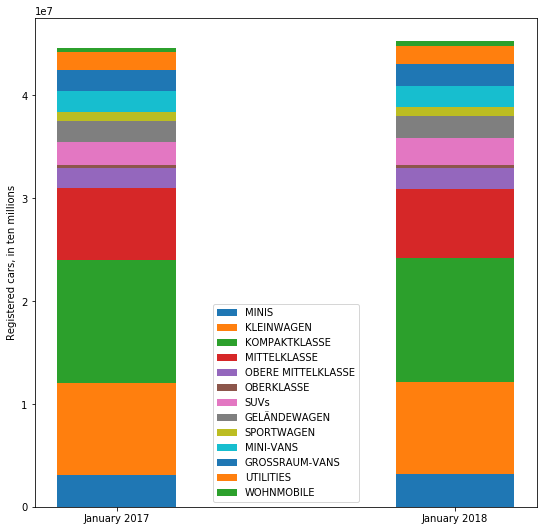

In [7]:
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(9,9))

# Offset values per bar, to stack them correctly.
a = 0
b = 0

for i in range(len(car_segment_by_year[:])):
    plt.bar([0,1], car_segment_by_year[i], width, 
            label=segment[i], bottom=(a, b))
    
    # Add bar size to offset to adjust starting point
    # for the following bar stacked oupon the recent bar.
    a += car_segment_by_year[i][0]
    b += car_segment_by_year[i][1]

plt.legend()  # Upside down compared to bars.
plt.xticks([0,1], ('January 2017', 'January 2018'))
plt.ylabel('Registered cars, in ten millions')

plt.savefig('RegisteredCarsGermany.pdf', dpi=320)

In [8]:
pkw_data_2017_18

1. Januar 2018              \
Modellreihe                                       Anzahl Anteil in %   
MINIS               AUSTIN MINI                     8364         0.3   
                    CHEVROLET MATIZ                47673         1.5   
                    CHEVROLET SPARK                34527         1.1   
                    CITROEN C1                    102387         3.2   
                    DAIHATSU CUORE                 28148         0.9   
                    DAIHATSU MOVE                   2104         0.1   
                    DAIHATSU TREVIS                 3479         0.1   
                    FIAT CINQUECENTO                5844         0.2   
                    FIAT PANDA                    190519         6.0   
                    FIAT SEICENTO                  24982         0.8   
                    FIAT 500                      230151         7.2   
                    FORD KA                       175345         5.5   
                    HYUNDAI ATOS                   24517         0.8   
                    HYUNDAI I 10                  180271         5.6   
                    KIA PICANTO                   117628         3.7   
                    LANCIA YPSILON                  9071         0.3   
                    MITSUBISHI I-MIEV               1041         0.0   
                    NISSAN PIXO                    12496         0.4   
                    OPEL ADAM                     108675         3.4   
                    OPEL AGILA                     91710         2.9   
                    OPEL KARL                      22777         0.7   
                    PEUGEOT ION                     1073         0.0   
                    PEUGEOT 106                    32351         1.0   
                    PEUGEOT 107                    55183         1.7   
                    PEUGEOT 108                    12261         0.4   
                    RENAULT TWINGO                373864        11.7   
                    SEAT AROSA                     37147         1.2   
                    SEAT MARBELLA                   1396         0.0   
                    SEAT MII                       54525         1.7   
                    SKODA CITIGO                   77552         2.4   
...                                                  ...         ...   
UTILITIES           TOYOTA HIACE                    2002         0.1   
                    TOYOTA PROACE                   2215         0.1   
                    VW CADDY                      364576        20.5   
                    VW CRAFTER                      8799         0.5   
                    VW LT                           2639         0.1   
                    VW TRANSPORTER                528318        29.8   
                    VW TYP 2                        5173         0.3   
                    SONSTIGE                        4660         0.3   
UTILITIES ZUSAMMEN  SONSTIGE                     1775444         3.8   
WOHNMOBILE          CITROEN C25                     1216         0.2   
                    CITROEN JUMPER                 16115         3.3   
                    FIAT DUCATO                   231994        47.6   
                    FORD TRANSIT, TOURNEO          35428         7.3   
                    IVECO DAILY                     9664         2.0   
                    MERCEDES L 300-REIHE            1239         0.3   
                    MERCEDES MB 100                 1287         0.3   
                    MERCEDES SPRINTER              21814         4.5   
                    MERCEDES V-KLASSE               2981         0.6   
                    MERCEDES VIANO                  3923         0.8   
                    MERCEDES VITO                   1117         0.2   
                    PEUGEOT BOXER                   5897         1.2   
                    PEUGEOT J5                      3671         0.8   
                    RENAULT MASTER                  1033         0.2   
          